# Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, exp
import time
from scipy.special import erfinv, erf
plt.style.use('ggplot')

# Funções criadas

In [2]:
def cdf_cauchy(x, alfa):
    arr = (1/pi)*np.arctan(x/alfa) + (1/2)
    return arr


def gera_cauchy(k, alfa):
    x = np.random.uniform(0, 1, k)
    # Método da CDF inversa para gerar VAs com distribuição de Cauchy
    arr = alfa * np.tan(x*pi) - (pi/2)
    return np.sort(arr)


def cdf_lognormal(x, mi, sigma2):
    desv_padr = sqrt(sigma2)
    arr = 0.5 * (1 + erf((np.log(x) - mi) / (desv_padr*sqrt(2))))
    return arr


def gera_lognormal(k, mi, sigma2):
    x = np.random.uniform(0, 1, k)
    # Método da CDF inversa para gerar VAs com distribuição Lognormal
    arr = np.exp(mi + sqrt(2*sigma2)*erfinv(2*x-1))
    return np.sort(arr)


def cdf_pareto(x, alfa, xm):
    arr = 1 - (xm/x)**alfa
    return arr


def gera_pareto(k, alfa, xm):
    x = np.random.uniform(0, 1, k)
    # Método da CDF inversa para gerar VAs com distribuição de Pareto
    arr = xm*(1 - x)**(-1/alfa)
    return np.sort(arr)


def cdf_laplace(x, mi, b):
    arr = .5 + .5*np.sign(x - mi)*(1 - np.exp(-1*(abs(x-mi)/b)))
    return arr


def gera_laplace(k, mi, b):
    x = np.random.uniform(0, 1, k)
    # Método da CDF inversa para gerar VAs com distribuição de Laplace
    arr = mi - b*np.sign(x - .5)*np.log(1 - 2*abs(x - .5))
    return np.sort(arr)


def cdf_rayleigh(x, sigma):
    arr = 1 - np.exp(-x**2/(2*sigma**2))
    return arr


def gera_rayleigh(k, sigma):
    x = np.random.uniform(0, 1, k)
    # Método da CDF inversa para gerar VAs com distribuição de Rayleigh
    arr = sigma*np.sqrt(-2*np.log(1-x))
    return np.sort(arr)


# DISTRIBUIÇÃO DE CAUCHY

A Função de Densidade de Probabilidade (PDF) da distribuição de Cauchy é dada por: $ \\f(X) = \frac{1}{\pi\gamma\Bigg[1 + \Bigg(\frac{x - x_{0}}{\gamma}\Bigg)^{2}\Bigg]} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \frac{1}{\pi}arctan\Bigg(\frac{x - x_{0}}{\gamma}\Bigg) + \frac{1}{2} $ 

In [3]:
alfa = 3

## Histograma

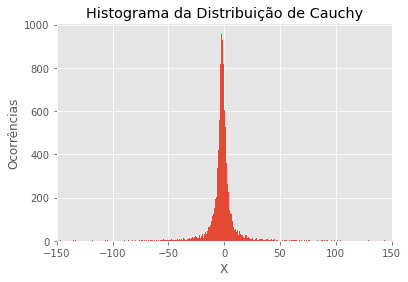

In [4]:
cauchy_va = gera_cauchy(10000, alfa)
plt.hist(cauchy_va, bins=10000)
plt.title('Histograma da Distribuição de Cauchy')
plt.xlabel('X')
plt.ylabel('Ocorrências')
plt.xlim([-150,150])
plt.show()

## CDF da Cauchy

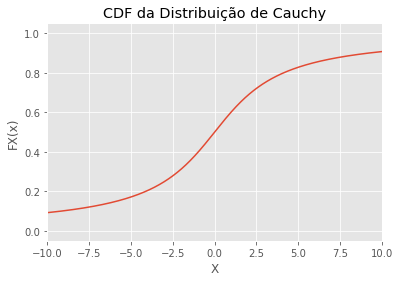

In [5]:
cauchy_fx = cdf_cauchy(cauchy_va, alfa)
plt.plot(cauchy_va, cauchy_fx)
plt.xlim([-10,10])
plt.title('CDF da Distribuição de Cauchy')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição de Cauchy: indefinida

Variância da distribuição de Cauchy: indefinida

In [6]:
cauchy_media = np.mean(cauchy_va)
cauchy_vari = np.var(cauchy_va)
print(f'Media experimental: {cauchy_media:.2f} \nMedia Teorica: Indefinida')
print(f'Variancia experimental: {cauchy_vari:.2f} \nVariancia Teorica: Indefinida')

Media experimental: 1.07 
Media Teorica: Indefinida
Variancia experimental: 15220.54 
Variancia Teorica: Indefinida


# DISTRIBUIÇÃO LOG-NORMAL

A Função de Densidade de Probabilidade (PDF) da distribuição de Cauchy é dada por: $ \\f(X) = \frac{1}{x\sigma\sqrt{2\pi}}\ \exp \Bigg(-\frac{(\ln(x)-\mu)^{2}}{2\sigma^{2}}\Bigg) $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \frac{1}{2}\Bigg[1 + erf\Bigg(\frac{\ln x-\mu}{\sigma\sqrt{2}}\Bigg)\Bigg] $

In [7]:
mi, sigma2 = 0, .25

## Histograma

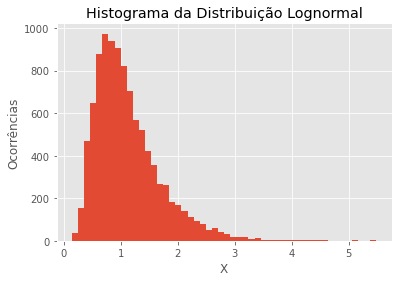

In [8]:
lognormal_va = gera_lognormal(10000, mi, sigma2)
plt.hist(lognormal_va, bins=50)
plt.title('Histograma da Distribuição Lognormal')
plt.xlabel('X')
plt.ylabel('Ocorrências')
plt.show()

## CDF da Lognormal

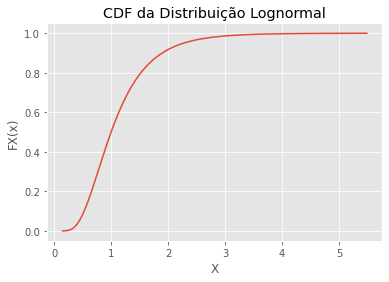

In [9]:
lognormal_fx = cdf_lognormal(lognormal_va, mi, sigma2)
plt.plot(lognormal_va, lognormal_fx)
plt.title('CDF da Distribuição Lognormal')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição Lognormal: $ \\E(X) = \exp({\mu + \frac{\sigma^{2}}{2}})$

Variância da distribuição Lognormal: $ \\Var(X) = (\exp(\sigma^{2}) - 1)\exp(2\mu + \sigma^{2})$

In [10]:
lognormal_media = np.mean(lognormal_va)
lognormal_vari = np.var(lognormal_va)
print(f'Media experimental: {lognormal_media:.2f} \nMedia Teorica: {exp(mi + (sigma2/2)):.2f}')
print(f'Variancia experimental: {lognormal_vari:.2f} \nVariancia Teorica: {(exp(sigma2) - 1)*exp(2*mi + sigma2):.2f}')

Media experimental: 1.13 
Media Teorica: 1.13
Variancia experimental: 0.34 
Variancia Teorica: 0.36


# DISTRIBUIÇÃO DE PARETO

A Função de Densidade de Probabilidade (PDF) da distribuição de Pareto é dada por: $ \\f(X) = \frac{\alpha x_{m}^{a}}{x^{\alpha+1}} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = 1 - \big(\frac{x_{m}}{x}\big)^{\alpha} $ 

In [11]:
alfa_pareto, xm = 3, 1

## Histograma

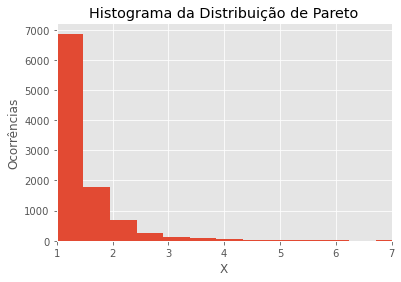

In [12]:
pareto_va = gera_pareto(10000, alfa_pareto, xm)
plt.hist(pareto_va, bins=50)
plt.xlim([1,7])
plt.title('Histograma da Distribuição de Pareto')
plt.xlabel('X')
plt.ylabel('Ocorrências')
plt.show()

## CDF da Distribuição de Pareto

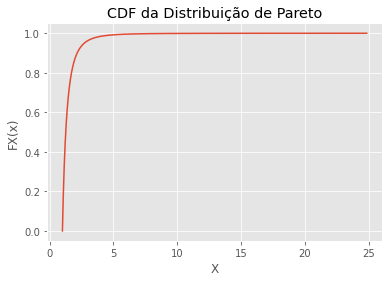

In [13]:
pareto_fx = cdf_pareto(pareto_va, alfa_pareto, xm)
plt.plot(pareto_va, pareto_fx)
plt.title('CDF da Distribuição de Pareto')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição de Pareto: $ \\E(X) =\begin{cases}\infty & \alpha <= 1\\\frac{\alpha x_{m}}{\alpha-1} & \alpha > 1\end{cases} $

Variância da distribuição de Pareto: $ \\  Var(X) =\begin{cases}\infty & \alpha <= 2\\\frac{x_{m}^{2}\alpha}{(\alpha-1)^{2}(\alpha-2)} & \alpha > 2\end{cases} $

In [14]:
pareto_media = np.mean(pareto_va)
pareto_vari = np.var(pareto_va)
print(f'Media experimental: {pareto_media:.2f} \nMedia Teorica: {xm*(2**(1/alfa_pareto)):.2f}')
print(f'Variancia experimental: {pareto_vari:.2f} \nVariancia Teorica: {(xm**2*alfa_pareto)/((alfa_pareto-1)**2 * (alfa_pareto - 2))}')

Media experimental: 1.50 
Media Teorica: 1.26
Variancia experimental: 0.63 
Variancia Teorica: 0.75


# DISTRIBUIÇÃO DE LAPLACE

A Função de Densidade de Probabilidade (PDF) da distribuição de Laplace é dada por: $ \\f(X) = \frac{1}{2b}\exp\bigg(-\frac{|x - \mu|}{b}\bigg) $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \begin{cases}\frac{1}{2}\exp\bigg(\frac{x-\mu}{b}\bigg) & x < \mu\\1 - \frac{1}{2}\exp\bigg(-\frac{x-\mu}{b}\bigg) & x >= \mu\end{cases}  $ 

In [15]:
mi_laplace, b = 0, 2

## Histograma

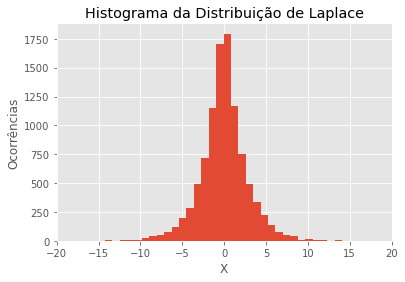

In [16]:
laplace_va = gera_laplace(10000, mi_laplace, b)
plt.hist(laplace_va, bins=50)
plt.xlim([-20,20])
plt.title('Histograma da Distribuição de Laplace')
plt.xlabel('X')
plt.ylabel('Ocorrências')
plt.show()

## CDF da Distribuição de Laplace

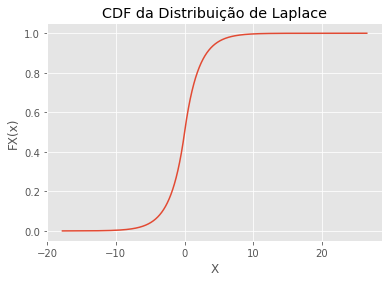

In [17]:
laplace_fx = cdf_laplace(laplace_va, mi_laplace, b)
plt.plot(laplace_va, laplace_fx)
plt.title('CDF da Distribuição de Laplace')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição de Laplace: $ \\E(X) = \mu $

Variância da distribuição de Laplace: $ \\Var(X) = 2b^{2} $

In [18]:
laplace_media = np.mean(laplace_va)
laplace_vari = np.var(laplace_va)
print(f'Media experimental: {laplace_media:.2f} \nMedia Teorica: {mi_laplace}')
print(f'Variancia experimental: {laplace_vari:.2f} \nVariancia Teorica: {2*b**2}')

Media experimental: -0.01 
Media Teorica: 0
Variancia experimental: 8.04 
Variancia Teorica: 8


# DISTRIBUIÇÃO DE RAYLEIGH

A Função de Densidade de Probabilidade (PDF) da distribuição de Rayleigh é dada por: $ \\f(X) = \frac{x}{\sigma^{2}}e^{-x^{2}/(2\sigma^{2})} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = 1 - e^{-x^{2}/(2\sigma^{2})}  $ 

In [19]:
sigma_ray = 2

## Histograma

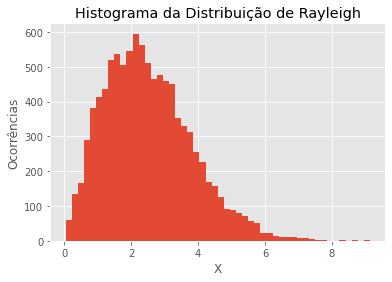

In [20]:
rayleigh_va = gera_rayleigh(10000, sigma_ray)
plt.hist(rayleigh_va, bins=50)
plt.title('Histograma da Distribuição de Rayleigh')
plt.xlabel('X')
plt.ylabel('Ocorrências')
plt.show()

## CDF da Distribuição de Rayleigh

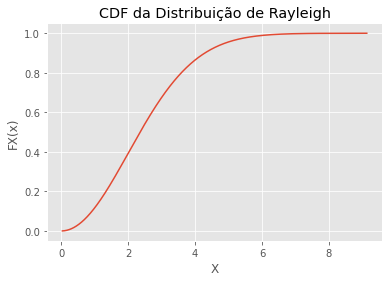

In [21]:
rayleigh_fx = cdf_rayleigh(rayleigh_va, sigma_ray)
plt.plot(rayleigh_va, rayleigh_fx)
plt.title('CDF da Distribuição de Rayleigh')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição de Rayleigh: $ \\E(X) =\sigma\sqrt{\frac{\pi}{2}} $

Variância da distribuição de Rayleigh: $ \\Var(X) =\frac{4 - \pi}{2}\sigma^{2} $

In [22]:
rayleigh_media = np.mean(rayleigh_va)
rayleigh_vari = np.var(rayleigh_va)
print(f'Media experimental: {rayleigh_media:.2f} \nMedia Teorica: {sigma_ray*sqrt(pi/2):.2f}')
print(f'Variancia experimental: {rayleigh_vari:.2f} \nVariancia Teorica: {((4-pi)/2)*sigma_ray**2:.2f}')

Media experimental: 2.50 
Media Teorica: 2.51
Variancia experimental: 1.68 
Variancia Teorica: 1.72
